In [1]:
library(dplyr)
library(Matrix)
library(data.table)
library(Seurat)
library(RColorBrewer)
library(cowplot)
library(future)
library(ComplexHeatmap)
library(viridis)
library(SeuratObject)
library(readxl)
library(BayesSpace)
library(SingleCellExperiment)
library(ggplot2)
library(getopt)
library(reshape2)
library(gridExtra)
library(harmony)
library(imager)
library(ArchR)
library(ggplot2)
library(ggrastr)
library(parallel) 
library(ggplot2)
library(cols4all)
library(cowplot)
library("shinyjs")
library("kableExtra")
library("colorblindcheck")
library(tidydr) 
options(warn=-1) 
source("/data/work/AD/bin/batch2/00.code/function.R")
cols <- c(brewer.pal(9, "Set1"),brewer.pal(8,"Set2")[1:8],brewer.pal(12,"Paired")[1:12],brewer.pal(8,"Dark2")[1:8],brewer.pal(8,"Accent"))
suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
# suppressMessages(library(SeuratData))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(randomForest))
suppressMessages(library(harmony))
# suppressMessages(library(BPCells))
suppressMessages(library(reticulate))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Attaching SeuratObject

Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be su

In [2]:
df <- fread("/data/input/WT202410120001739/SAW-ST-V7/04.tissuecut/D04303D1.tissue.gem.gz")

In [3]:
df[1:5,]

geneID,x,y,MIDCount,ExonCount
<chr>,<int>,<int>,<int>,<int>
A1BG,141,3553,3,3
A1BG,142,5502,1,1
A1BG,143,6002,1,1
A1BG,155,13470,1,1
A1BG,157,11530,1,1


In [5]:
unique(df$geneID)[grep("MT-",unique(df$geneID))]

[1] "INMT-MINDY4" "MT-ATP6"     "MT-ATP8"     "MT-CO1"      "MT-CO2"     
 [6] "MT-CO3"      "MT-CYB"      "MT-ND1"      "MT-ND2"      "MT-ND3"     
[11] "MT-ND4"      "MT-ND4L"     "MT-ND5"      "MT-ND6"      "MT-RNR1"    
[16] "MT-RNR2"     "MT-TA"       "MT-TC"       "MT-TD"       "MT-TE"      
[21] "MT-TF"       "MT-TG"       "MT-TH"       "MT-TI"       "MT-TK"      
[26] "MT-TL1"      "MT-TL2"      "MT-TM"       "MT-TN"       "MT-TP"      
[31] "MT-TQ"       "MT-TR"       "MT-TS1"      "MT-TS2"      "MT-TT"      
[36] "MT-TV"       "MT-TW"       "MT-TY"

In [6]:
length(unique(df$geneID)[grep("MT-",unique(df$geneID))])

[1] 38

In [7]:
length(unique(df$geneID))

[1] 45802

In [4]:
setwd("/data/work/AD/bin/batch5/04.SCT&h5.data")

In [ ]:
SN_list = c('D04305A6', 'D04305A4', 'C04595F1', 'D03556C4', 'D03556D4', 'D03556D6',
            'D03556E4', 'D03556E6', 'C04595E2', 'D03556F4', 'D03556F6', 'D04303A6', 'D03556E2')

In [ ]:
# meta.list <- list()
# for (i in 1:length(SN_list)){
#   chipname = SN_list[i]
#   print(chipname)
  
#   obj <- readRDS(paste0("/data/work/AD/bin/batch5/04.SCT&h5.data/",chipname,".bin100.SCT.rds"))
#   meta.list[[chipname]] <- obj@meta.data
#   meta.list[[chipname]]$SN <- chipname
# }
# saveRDS(meta.list,file <- "/data/work/AD/bin/batch5/04.SCT&h5.data/meta.list.rds")

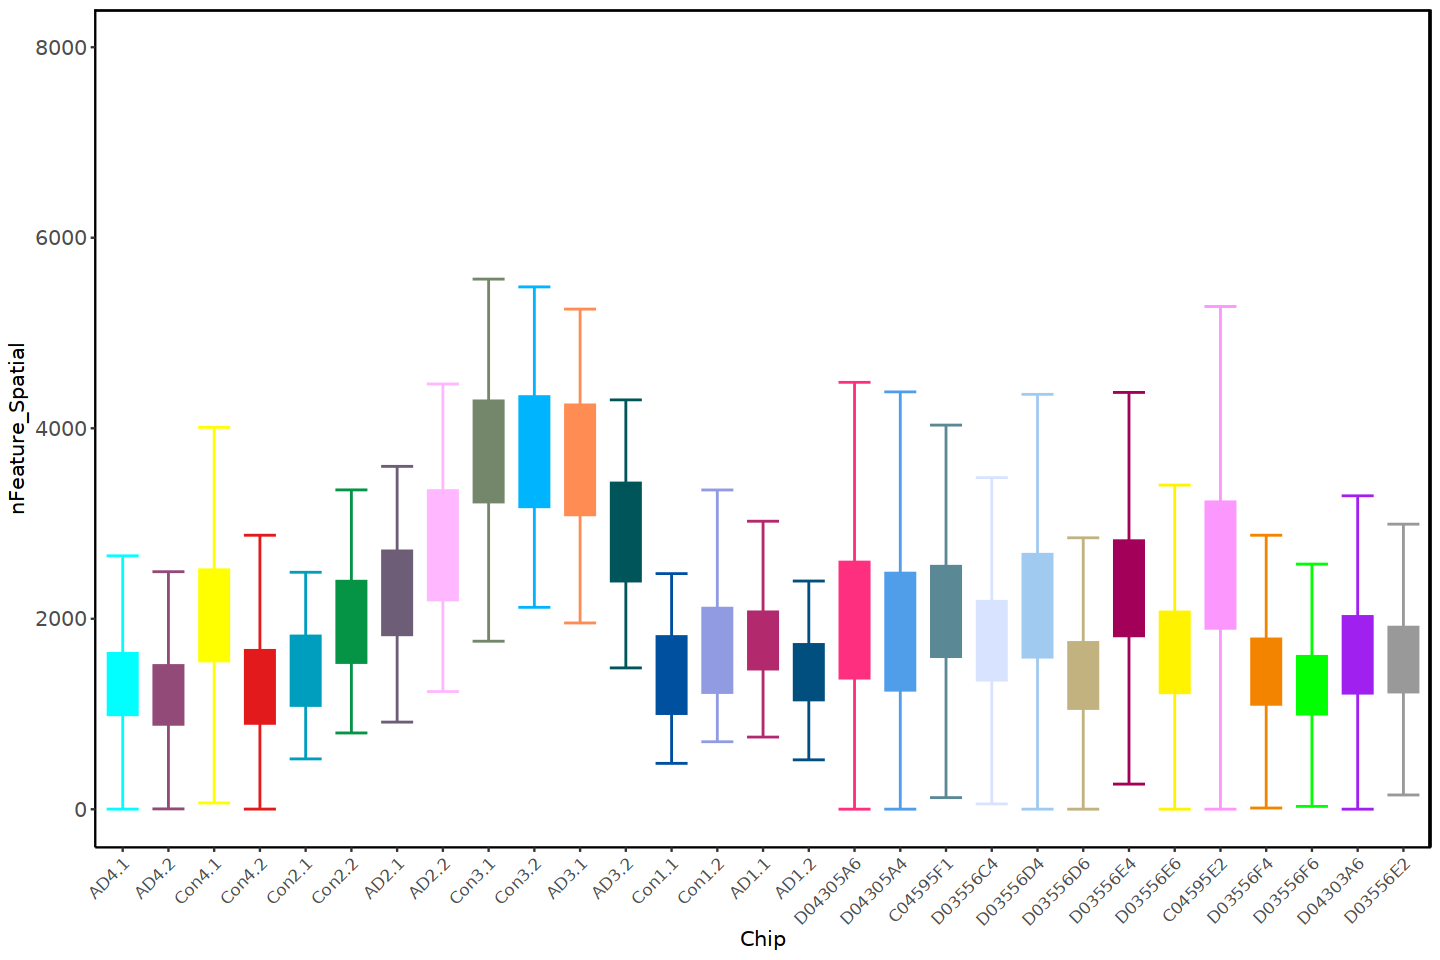

In [5]:
meta.list <- readRDS("/data/work/AD/bin/batch5/04.SCT&h5.data/meta.list.rds")
meta.new <- do.call(rbind,meta.list)
meta.old <- readRDS("/data/work/AD/bin/Merge.16/meta.batch1234.rds")
meta.old$SN <- meta.old$chip
meta.old <- meta.old[,c("nFeature_RNA","nCount_RNA","SN")]
colnames(meta.old) <- c("nFeature_Spatial","nCount_Spatial","SN")
meta.new <- meta.new[,c("nFeature_Spatial","nCount_Spatial","SN")]
meta.old$group <- "1"
meta.new$group <- "2"
meta.all <- rbind(meta.old,meta.new)

p1=ggplot(meta.all, aes(x=SN, y=nFeature_Spatial, color=SN, fill=SN))+
    annotate(geom = 'segment', y = Inf, yend = Inf, color = 'black', x = -Inf, xend = Inf, size =1) +
    annotate(geom = 'segment', y = Inf, yend = -Inf, color = 'black', x = Inf, xend = Inf, size =1)+
    #scale_fill_manual(values = cols)+
    stat_boxplot(geom = "errorbar", # 画误差棒
               size=.6, # 线条的粗细
               width=0.7, # 误差棒的宽度，和下边箱型图的宽度设置一样宽，不然会错开
               linetype="solid", # 线条的类型，solid是实线，dashed是虚线，dotted是点线，blank是没有线
               position=position_dodge(.8) #同一个X对应的不同颜色的组别别之间的间距
               )+ 
    geom_boxplot(outlier.colour = NA, # 不展示离群点
               size=.6, #边框线条的粗细
               width=0.7, #箱体的宽度，和上边误差棒的宽度保持一致
               linetype="blank", # 线条的类型，solid是实线，dashed是虚线，dotted是点线，blank是没有线
               position=position_dodge(.8)#同一个X对应的不同颜色的组别别之间的间距
               )+ 
     # facet_wrap(.~group, ncol=2)+
     scale_fill_manual(values = colsblack)+ # 箱体边框和误差棒线条的颜色设置，
     scale_color_manual(values = colsblack)+ # 箱体的颜色设置
     coord_cartesian(ylim=c(0,8000))+ # 设置y轴的范围，这个只是把图框到这个范围内，图不会发生改变，而直接用ylim设置y轴范围，会把这个范围外的点都去掉后重新作图，这样范围不一样时图会不一样，如果觉得是异常点，想去掉后作图，就用ylim()，否则用这个
     labs(x="Chip", y="nFeature_Spatial")+ #设置x轴和y轴的标题
     theme_classic() +#设置图背景，我常用theme_classic()，或者theme_test，或者theme_minimal
     theme(axis.text.x = element_text(angle=45,hjust=1),axis.title.x=element_text(size=12),axis.title.y=element_text(size=12),
             axis.text.y = element_text(size = 12),
     text = element_text(size = 12),panel.grid=element_blank())+theme(legend.position="none")+
     scale_x_discrete(limits=c(unique(meta.old$SN),unique(meta.new$SN)))
#ggsave("chip.feature.pdf",p1,width=5,height=5)
options(repr.plot.width=12, repr.plot.height=8)
p1

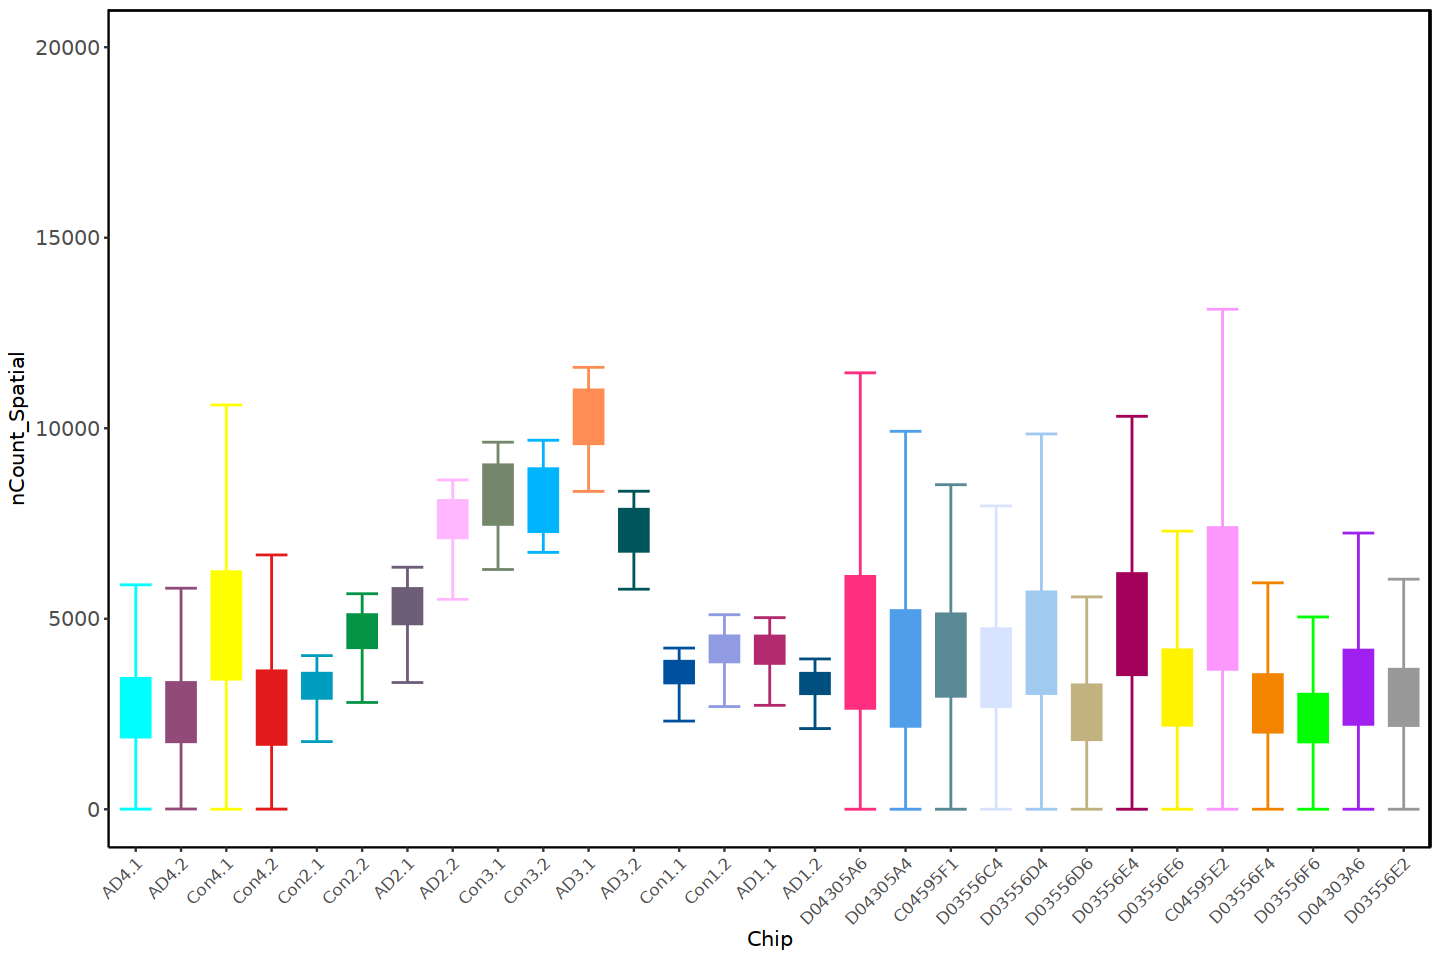

In [6]:
p2=ggplot(meta.all, aes(x=SN, y=nCount_Spatial, color=SN, fill=SN))+
    annotate(geom = 'segment', y = Inf, yend = Inf, color = 'black', x = -Inf, xend = Inf, size =1) +
    annotate(geom = 'segment', y = Inf, yend = -Inf, color = 'black', x = Inf, xend = Inf, size =1)+
    #scale_fill_manual(values = cols)+
    stat_boxplot(geom = "errorbar", # 画误差棒
               size=.6, # 线条的粗细
               width=0.7, # 误差棒的宽度，和下边箱型图的宽度设置一样宽，不然会错开
               linetype="solid", # 线条的类型，solid是实线，dashed是虚线，dotted是点线，blank是没有线
               position=position_dodge(.8) #同一个X对应的不同颜色的组别别之间的间距
               )+ 
    geom_boxplot(outlier.colour = NA, # 不展示离群点
               size=.6, #边框线条的粗细
               width=0.7, #箱体的宽度，和上边误差棒的宽度保持一致
               linetype="blank", # 线条的类型，solid是实线，dashed是虚线，dotted是点线，blank是没有线
               position=position_dodge(.8)#同一个X对应的不同颜色的组别别之间的间距
               )+ 
     # facet_wrap(.~group, ncol=2)+
     scale_fill_manual(values = colsblack)+ # 箱体边框和误差棒线条的颜色设置，
     scale_color_manual(values = colsblack)+ # 箱体的颜色设置
     coord_cartesian(ylim=c(0,20000))+ # 设置y轴的范围，这个只是把图框到这个范围内，图不会发生改变，而直接用ylim设置y轴范围，会把这个范围外的点都去掉后重新作图，这样范围不一样时图会不一样，如果觉得是异常点，想去掉后作图，就用ylim()，否则用这个
     labs(x="Chip", y="nCount_Spatial")+ #设置x轴和y轴的标题
     theme_classic() +#设置图背景，我常用theme_classic()，或者theme_test，或者theme_minimal
     theme(axis.text.x = element_text(angle=45,hjust=1),axis.title.x=element_text(size=12),axis.title.y=element_text(size=12),
             axis.text.y = element_text(size = 12),
     text = element_text(size = 12),panel.grid=element_blank())+theme(legend.position="none")+
     scale_x_discrete(limits=c(unique(meta.old$SN),unique(meta.new$SN)))
#ggsave("chip.feature.pdf",p1,width=5,height=5)
options(repr.plot.width=12, repr.plot.height=8)
p2

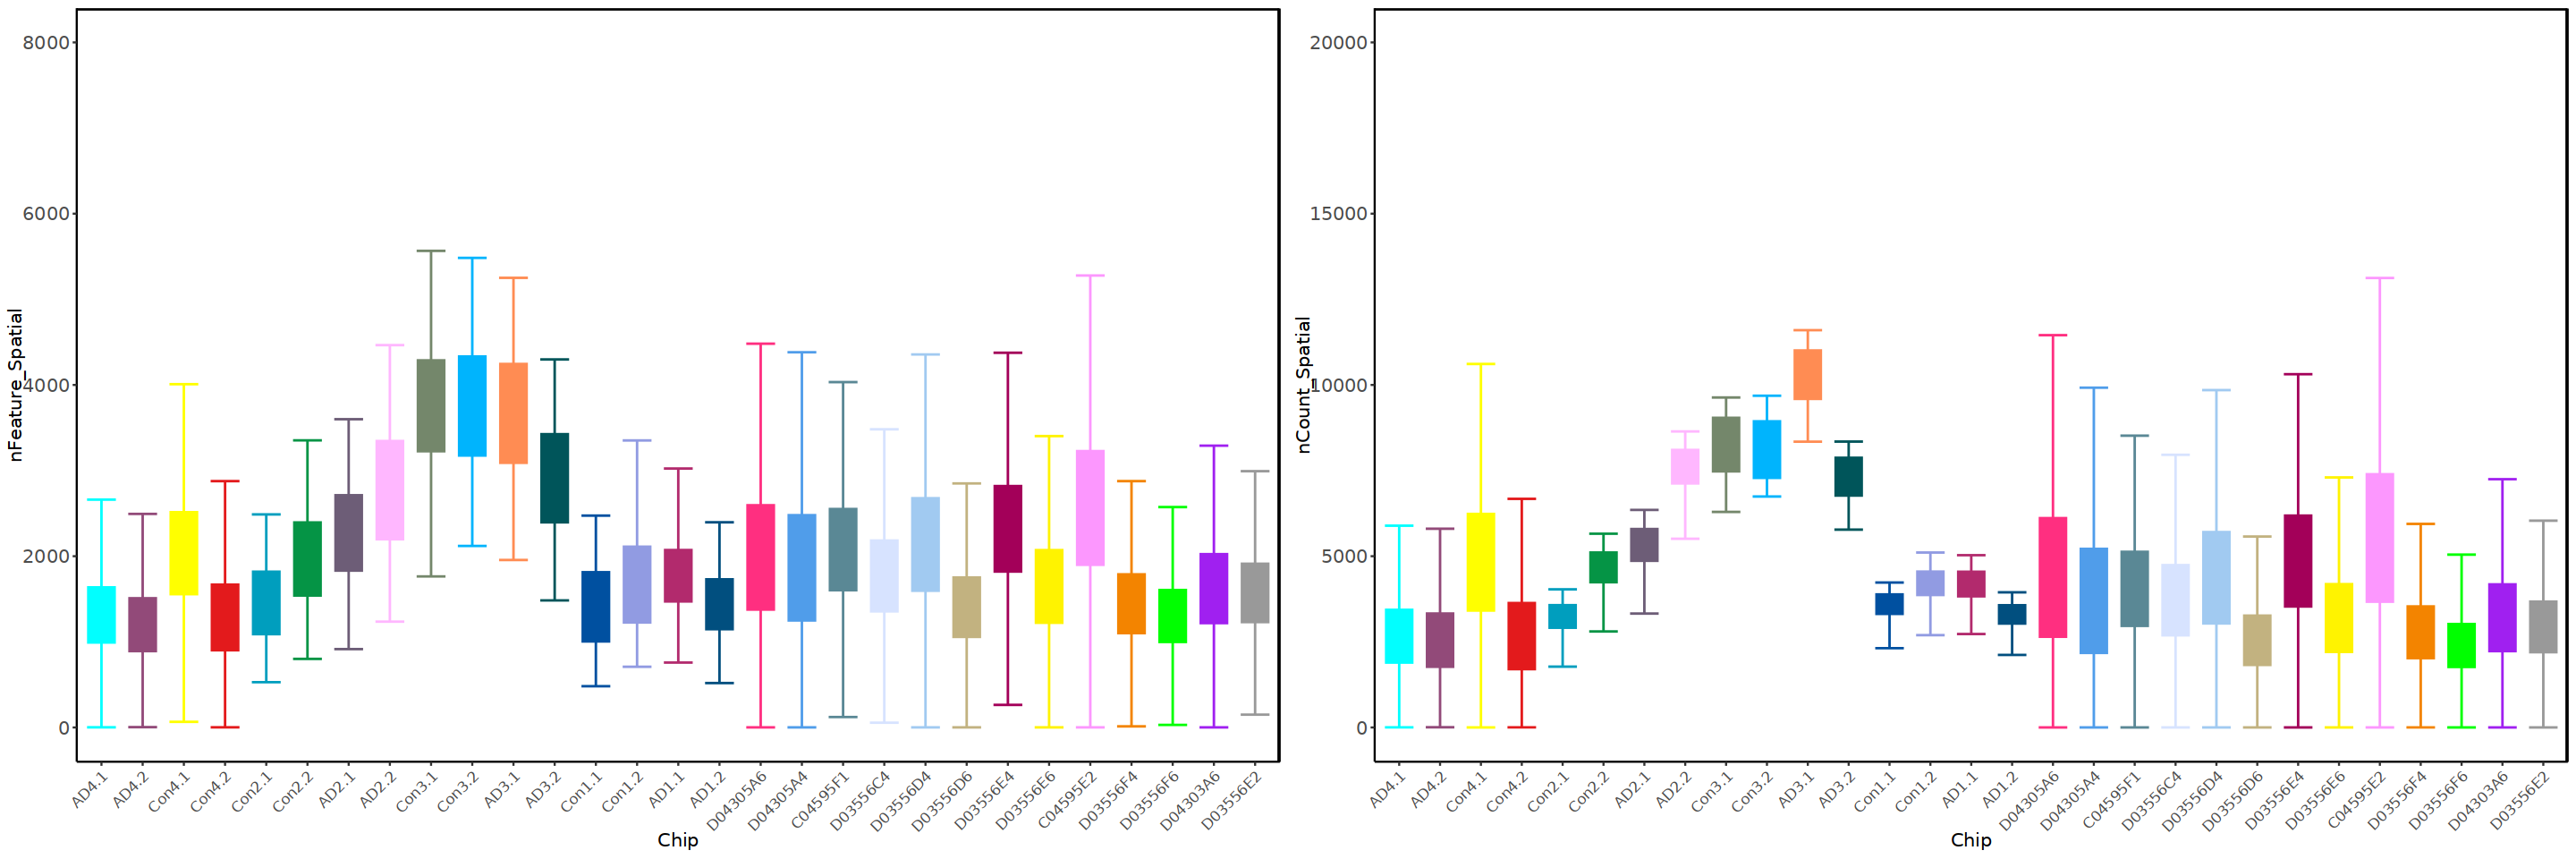

In [7]:
p_all=plot_grid(plotlist =list(p1,p2),ncol = 2)
options(repr.plot.width=24, repr.plot.height=8)
p_all